In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from scipy.stats import mode, norm

### ANIMATAION 관련 ###
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [132]:
# @jit(nopython = True)
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros(n)
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

def RK4_vec(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y


# @jit(nopython = True)
def Non_uniform_osc(theta,t,omega,a):
    dtheta = omega - a*np.sin(theta)
    return dtheta

In [107]:
# theta_random = np.random.uniform(-np.pi, np.pi, size=N)
t = np.arange(0,30,0.1)
sol = RK4(Non_uniform_osc,0,t, args=(-1,-1.1))
# theta_s = sol[:,:N]
# Q = mode(np.round(np.diff((theta_s[-1]-np.pi)%(np.pi*2)+np.pi) / (np.pi*2/N),1))[0]

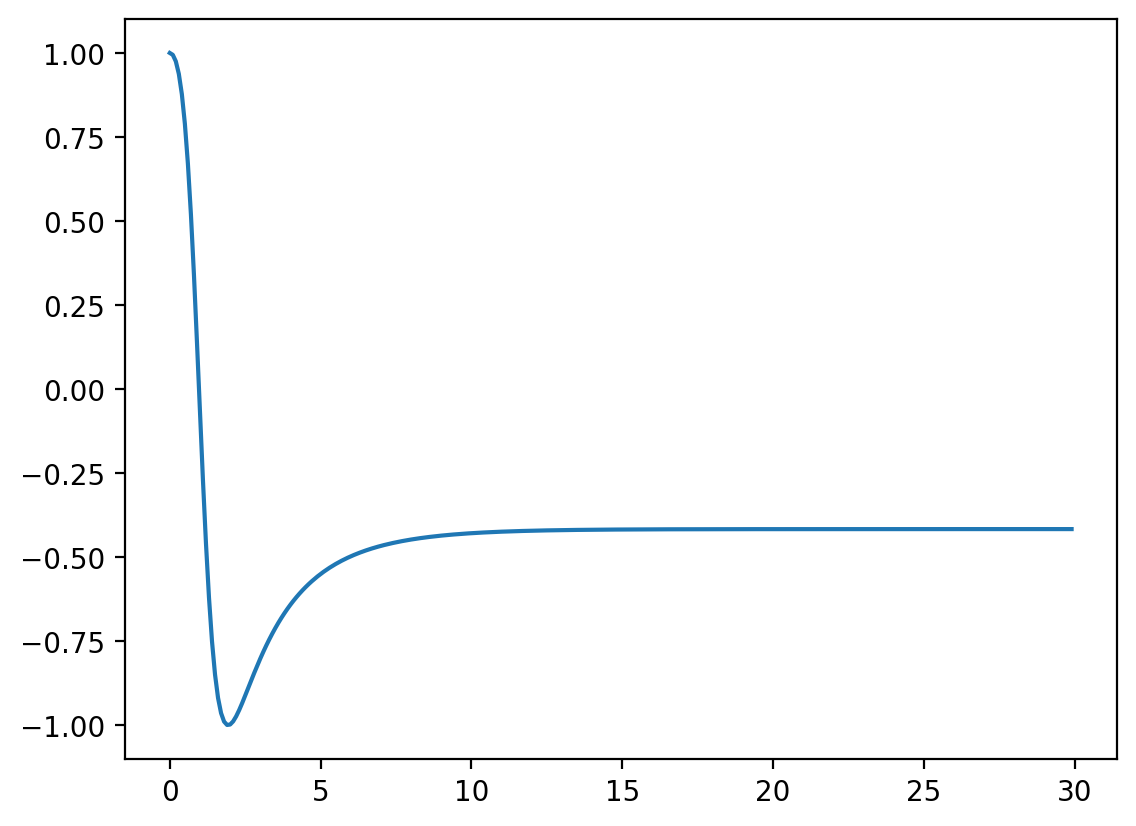

In [108]:
plt.plot(t,np.cos(sol))

(-1.2, 1.2, -1.2, 1.2)

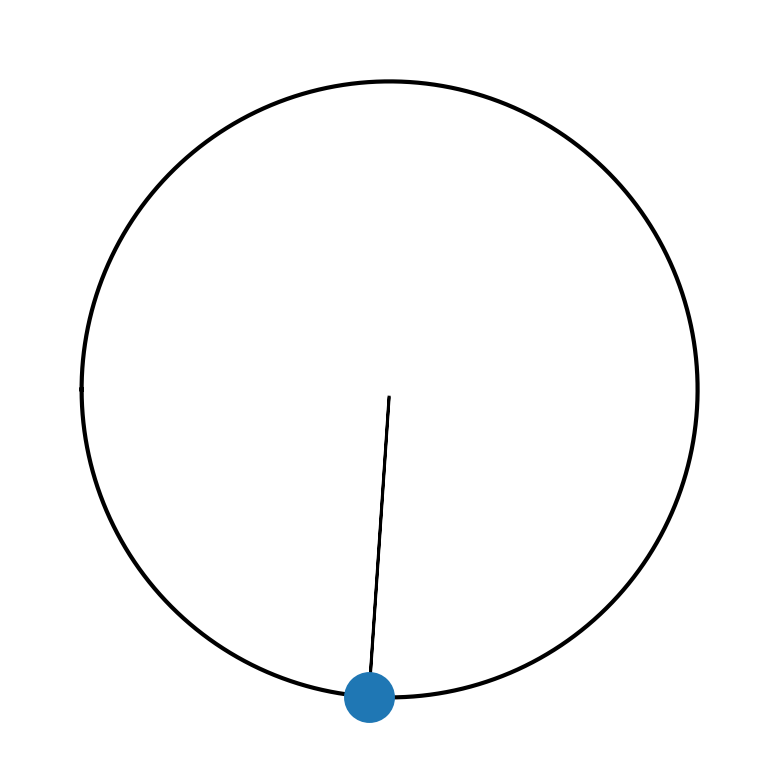

In [109]:
c_ = np.linspace(-np.pi,np.pi,10000)
fig, ax =  plt.subplots(1)
# plt.plot(np.cos(c_),np.sin(c_))
plt.gca().set_aspect('equal')

j = 10
length = 0.2
head = 0.05
ax.plot(np.cos(c_),np.sin(c_),color='black')
ax.arrow(0,0,np.cos(sol[j]),np.sin(sol[j]),head_starts_at_zero=True,length_includes_head=True,head_width=0.04, head_length=head ,fc='k', ec='k')
ax.scatter(np.cos(sol[j]),np.sin(sol[j]),s=300,zorder=3)

ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

In [110]:
def to_animation(idx):
    ax.clear()
    ax.plot(np.cos(c_),np.sin(c_),color='black')
    
    ax.arrow(0,0,np.cos(sol[idx]),np.sin(sol[idx]),head_starts_at_zero=True,length_includes_head=True,head_width=0.04, head_length=head ,fc='k', ec='k')
    ax.scatter(np.cos(sol[idx]),np.sin(sol[idx]),s=300,zorder=3)
    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-1.2,1.2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

In [111]:
%config InlineBackend.figure_format = 'retina'
idxs=  np.arange(0,300,2)
ani = FuncAnimation(fig,to_animation,frames=idxs,interval=50)

In [112]:
# 저장이 필요할 경우
ani.save(f'Sattle down animation.mp4',dpi=400)

In [113]:
# 확인용
HTML(ani.to_html5_video())

# Over damped

In [194]:

def Over_damped(Theta,t,m,b):
    theta,dtheta =Theta
    ddtheta = 1/m*(-b*dtheta - theta)
    return np.array([dtheta,ddtheta])

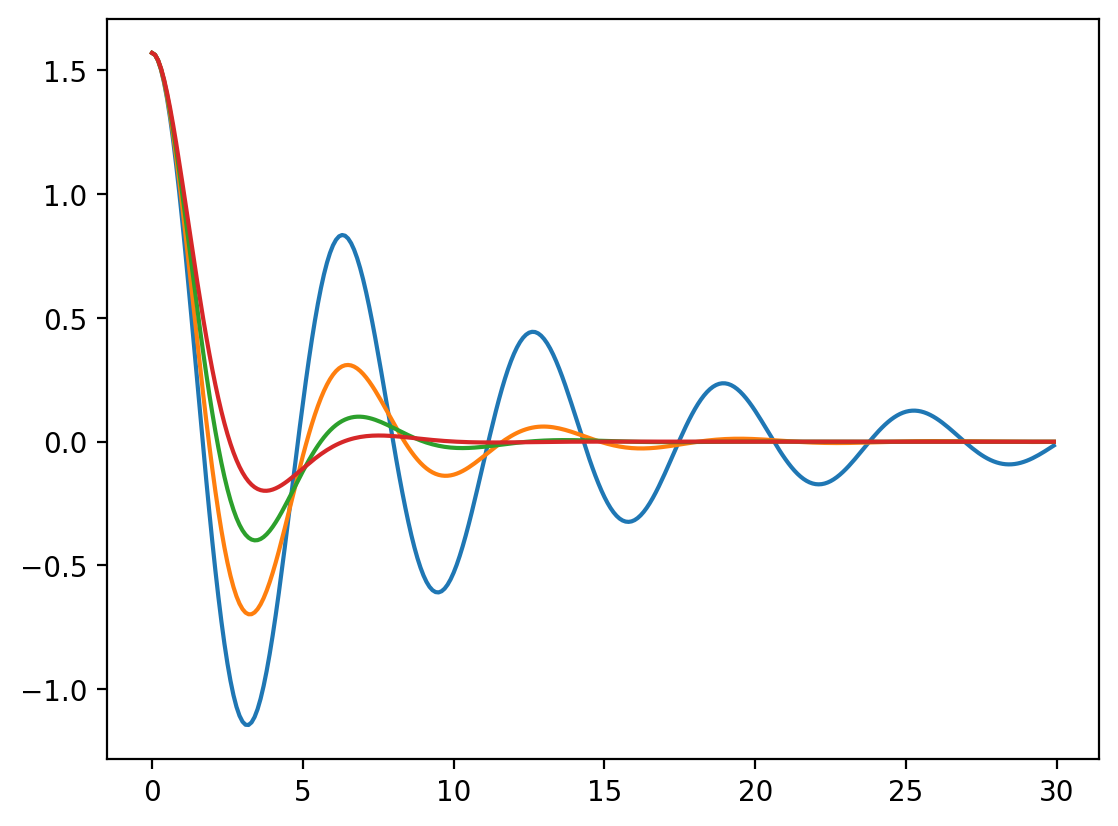

In [227]:
# theta_random = np.random.uniform(-np.pi, np.pi, size=N)
t = np.arange(0,30,0.1)
bs = [0.2,0.5,0.8,1.1]
b_thetas = []
for b in bs:
    sol = RK4_vec(Over_damped,np.array([np.pi/2,0]),t, args=(1,b))
    plt.plot(t,sol[:,0],label=f'b={b}')
    b_thetas.append(sol[:,0])

# theta_s = sol[:,:N]
# Q = mode(np.round(np.diff((theta_s[-1]-np.pi)%(np.pi*2)+np.pi) / (np.pi*2/N),1))[0]

(-1.2, 1.2, -1.2, 1.2)

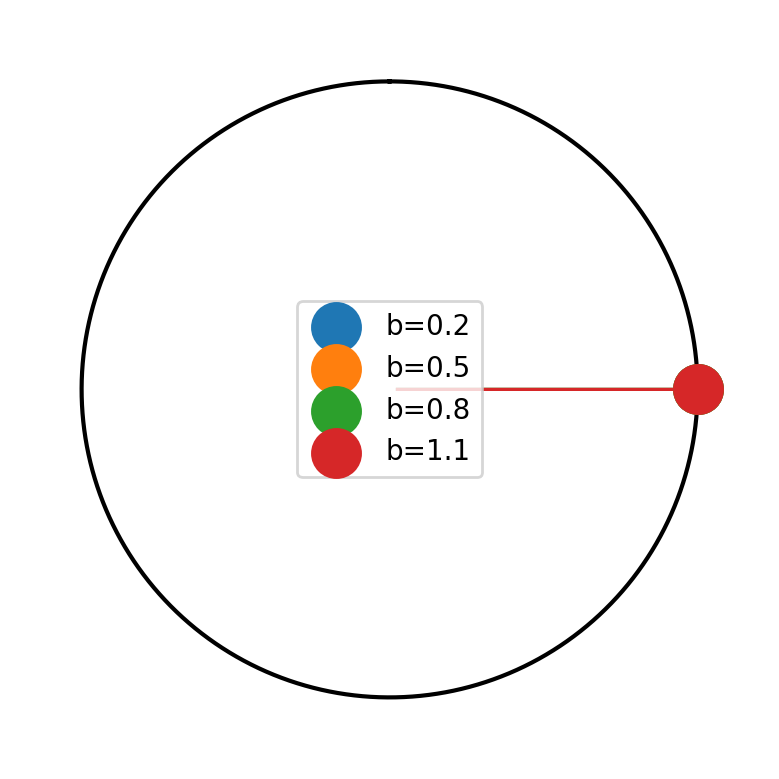

In [228]:
c_ = np.linspace(-np.pi,np.pi,10000)
fig, ax =  plt.subplots(1)
# plt.plot(np.cos(c_),np.sin(c_))
plt.gca().set_aspect('equal')

j = 0
length = 0.2
head = 0.05
ax.plot(np.sin(c_),-np.cos(c_),color='black')
colors = ['tab:blue','tab:orange','tab:green','tab:red']

for b,theta_s,color in zip(bs,b_thetas,colors):
    ax.arrow(0,0,np.sin(theta_s[j]),-np.cos(theta_s[j]),head_starts_at_zero=True,length_includes_head=True,head_width=0.04, head_length=head ,fc=color, ec=color)
    ax.scatter(np.sin(theta_s[j]),-np.cos(theta_s[j]),s=300,zorder=3,color=color,label=f'b={b}')

ax.legend()
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

In [229]:
def to_animation(idx):
    ax.clear()
    ax.plot(np.sin(c_),-np.cos(c_),color='black')
    colors = ['tab:blue','tab:orange','tab:green','tab:red']
    for b,theta_s,color in zip(bs,b_thetas,colors):
        ax.arrow(0,0,np.sin(theta_s[idx]),-np.cos(theta_s[idx]),head_starts_at_zero=True,length_includes_head=True,head_width=0.04, head_length=head ,fc=color, ec=color)
        ax.scatter(np.sin(theta_s[idx]),-np.cos(theta_s[idx]),s=300,zorder=3,color=color,label=f'b={b}')

    ax.legend()
    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-1.2,1.2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

In [230]:
%config InlineBackend.figure_format = 'retina'
idxs=  np.arange(0,300,2)
ani = FuncAnimation(fig,to_animation,frames=idxs,interval=50)

In [231]:
# 저장이 필요할 경우
ani.save(f'Over_damped.mp4',dpi=400)

In [232]:
# 확인용
HTML(ani.to_html5_video())